In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("csv\movie_dataset.csv")

In [9]:
dict_nans = {"Column": [], "NaN": []}
for column, nans in zip(df.columns, df.isna().sum()):
    dict_nans["Column"].append(column)
    dict_nans["NaN"].append(nans)
pd.DataFrame(dict_nans)

,Column,NaN
0,index,0
1,budget,0
2,genres,28
3,homepage,3091
4,id,0
5,keywords,412
6,original_language,0
7,original_title,0
8,overview,3
9,popularity,0


In [14]:
dict_dtypes = {"Column": [], "dtype": []}
for column, dtype in zip(df.columns, df.dtypes):
    dict_dtypes["Column"].append(column)
    dict_dtypes["dtype"].append(dtype)
pd.DataFrame(dict_dtypes)

,Column,dtype
0,index,int64
1,budget,int64
2,genres,object
3,homepage,object
4,id,int64
5,keywords,object
6,original_language,object
7,original_title,object
8,overview,object
9,popularity,float64


## Bar chart

In [10]:
lst_genres = []
for genre in list(set(df["genres"].unique())):
    for genre_word in str(genre).split(" "):
        lst_genres.append(genre_word)
genres = list(set(lst_genres))
genres.remove("Fiction")
genres[-6] = "Science Fiction"
genres.remove("nan")
print("Genres:", ", ".join(genres))

Genres: Family, Movie, TV, Action, Mystery, Animation, Documentary, War, Romance, Comedy, Drama, Horror, Thriller, Music, Foreign, Science Fiction, Adventure, Fantasy, Western, Crime, History


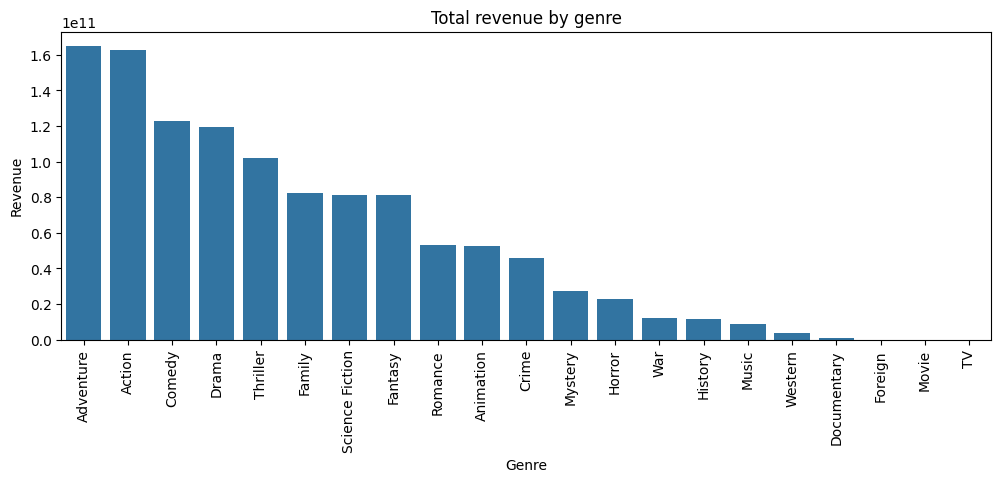

In [11]:
dict_revenues = {"Genre": [], "Revenue": []}
for genre in genres:
    dict_revenues["Genre"].append(genre)
    dict_revenues["Revenue"].append(df[df["genres"].str.contains(genre, na=False)]["revenue"].sum())
df_revenues = pd.DataFrame(dict_revenues)
df_revenues.sort_values(by=["Revenue"], ascending=False, inplace=True)

fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot()
ax.set_title("Total revenue by genre")
sns.barplot(df_revenues, x="Genre", y="Revenue", ax=ax)
ax.tick_params(axis="x", rotation=90);

## Line chart

In [19]:
df["release_date"] = pd.to_datetime(df["release_date"])
df["release_year"] = (df["release_date"].dt.year).astype("int64", errors="ignore")

# Chỉ sum các cột numeric
df_years = df.groupby(by=["release_year"]).sum(numeric_only=True)
df_years.sort_values(by=["release_year"], ascending=True, inplace=True)
df_years = df_years.iloc[:-2]

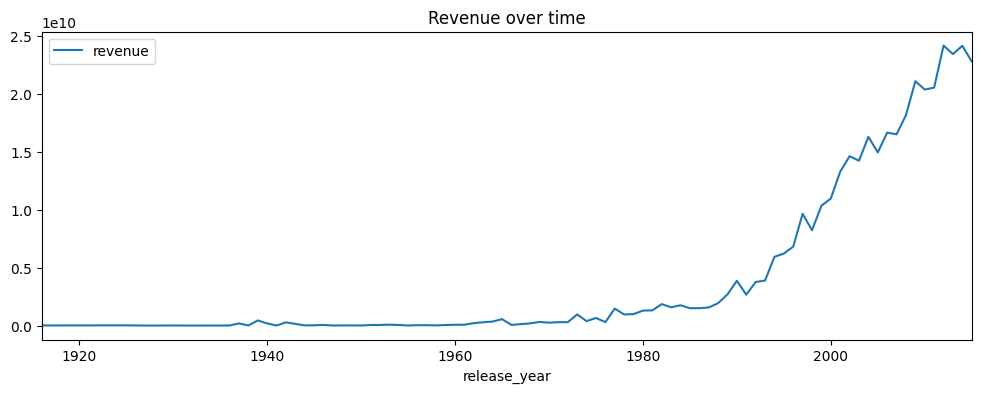

In [20]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot()
ax.set_title("Revenue over time")
df_years.plot(y="revenue", kind="line", ax=ax)
ax.set_xlim(df_years.index.min(), df_years.index.max());

## Histogram

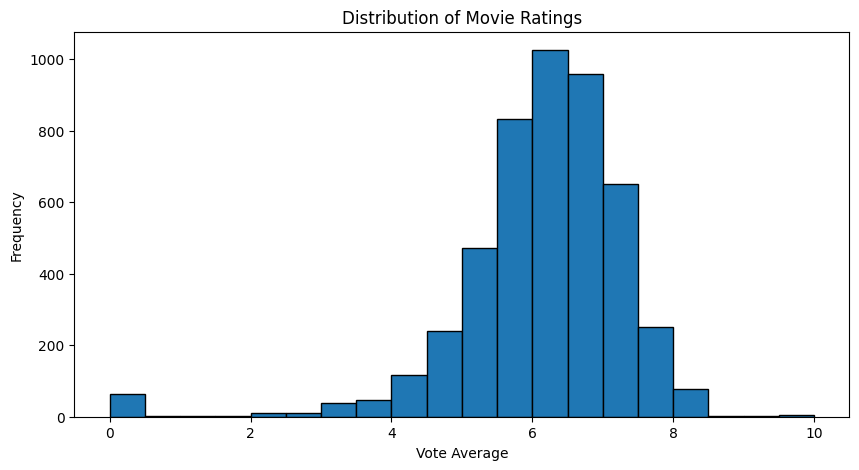

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(df['vote_average'].dropna(), bins=20, edgecolor='black')
ax.set_title('Distribution of Movie Ratings')
ax.set_xlabel('Vote Average')
ax.set_ylabel('Frequency')
plt.show()

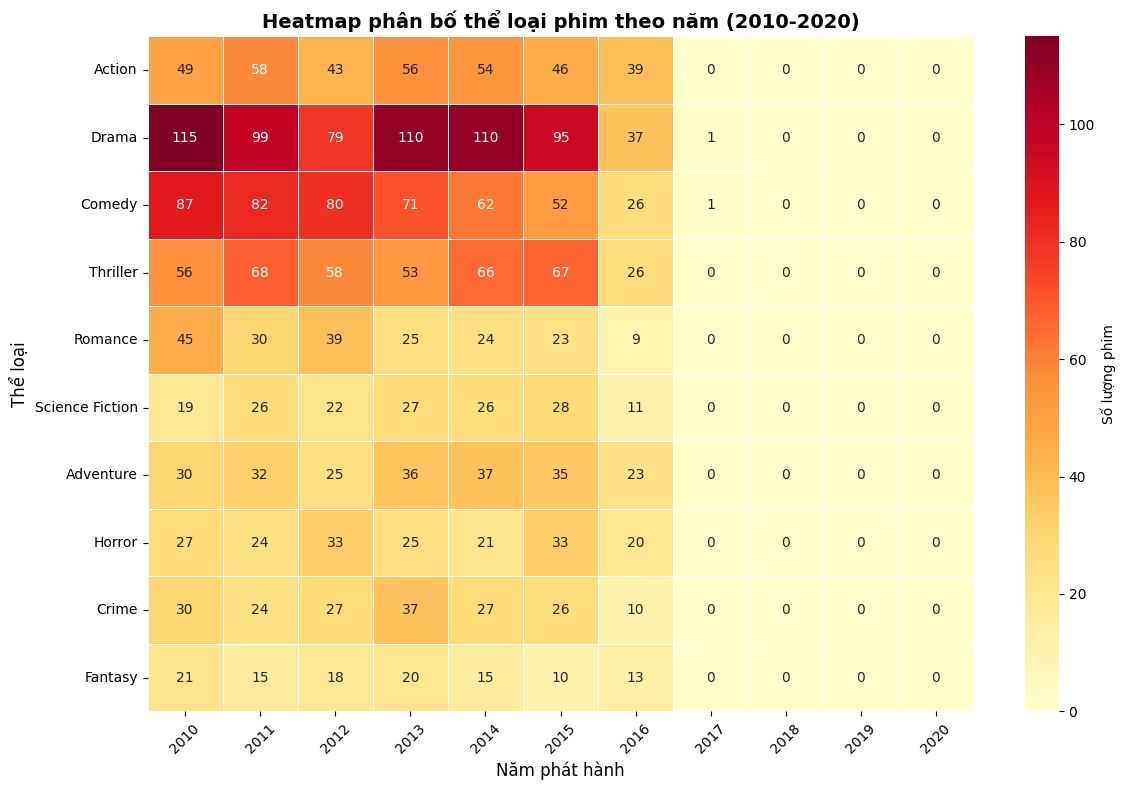


📊 Tổng số phim theo thể loại (2010-2020):
Drama              646
Comedy             461
Thriller           394
Action             345
Adventure          218
Romance            195
Horror             183
Crime              181
Science Fiction    159
Fantasy            112
dtype: int64


In [24]:
## Heatmap phân bố thể loại phim theo năm (dựa trên dữ liệu thực)

# Chuẩn bị dữ liệu
df_temp = df[['release_year', 'genres']].copy()
df_temp = df_temp.dropna()

# Lấy danh sách các thể loại chính
main_genres = ['Action', 'Drama', 'Comedy', 'Thriller', 'Romance', 
               'Science Fiction', 'Adventure', 'Horror', 'Crime', 'Fantasy']

# Tạo dictionary để đếm số phim
genre_year_counts = {genre: [] for genre in main_genres}
years_range = range(2010, 2021)  # 2010-2020

# Đếm số phim cho mỗi thể loại theo năm
for year in years_range:
    df_year = df_temp[df_temp['release_year'] == year]
    for genre in main_genres:
        count = df_year[df_year['genres'].str.contains(genre, na=False)].shape[0]
        genre_year_counts[genre].append(count)

# Tạo DataFrame để vẽ heatmap
heatmap_data = pd.DataFrame(genre_year_counts, index=years_range)

# Vẽ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data.T, annot=True, fmt='d', cmap='YlOrRd', 
            linewidths=0.5, cbar_kws={'label': 'Số lượng phim'})

plt.title('Heatmap phân bố thể loại phim theo năm (2010-2020)', fontsize=14, fontweight='bold')
plt.xlabel('Năm phát hành', fontsize=12)
plt.ylabel('Thể loại', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# In thống kê tổng quan
print("\n📊 Tổng số phim theo thể loại (2010-2020):")
print(heatmap_data.sum().sort_values(ascending=False))